<a href="https://colab.research.google.com/github/willystw/fastai-learning/blob/dog-identification/dog-identification/Dog_Breed_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.3 MB/s 
     |████████████████████████████████| 1.2 MB 37.2 MB/s 
     |████████████████████████████████| 186 kB 48.0 MB/s 
     |████████████████████████████████| 46 kB 4.1 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 51 kB 318 kB/s 
Mounted at /content/gdrive


In [2]:
#hide
from fastbook import *

Install Kaggle

In [3]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 3.2 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=75b0cdc52ac6a6c0a2db590fdfeeafd66c867cf55dd1c3d8dd6b27774632400d
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


Upload kaggle.json manually

In [4]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

rm: cannot remove '/root/.kaggle': No such file or directory
ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              233KB  2021-08-29 13:51:53          11337        936  1.0              
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           6921        521  0.9375           
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2675        197  1.0              
promptcloud/careerbuilder-job

In [5]:
!kaggle competitions download -c dog-breed-identification

100% 688M/691M [00:04<00:00, 149MB/s]
100% 691M/691M [00:04<00:00, 148MB/s]


In [6]:
!mkdir dog-breed
!unzip dog-breed-identification.zip -d dog-breed

Streaming output truncated to the last 5000 lines.
  inflating: dog-breed/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: dog-breed/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: dog-breed/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: dog-breed/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: dog-breed/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: dog-breed/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: dog-breed/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: dog-breed/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: dog-breed/train/83fad0718581a696132c96c166472627.jpg  
  inflating: dog-breed/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: dog-breed/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: dog-breed/train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: dog-breed/train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: dog-breed/train/840db91ba4600148f3dcb06ec419b421.jpg

In [7]:
df = pd.read_csv('dog-breed/labels.csv')
df

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [8]:
def get_x(r): return f"dog-breed/train/{r['id']}.jpg"
def get_y(r): return r['breed']

dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_x = get_x,
    get_y = get_y,
    splitter = RandomSplitter(seed=42),
    item_tfms = Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)

dls = dblock.dataloaders(df)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


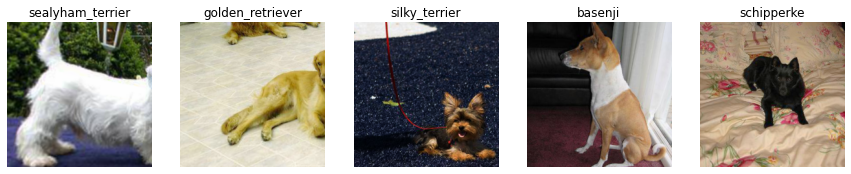

In [9]:
dls.show_batch(nrows=1, ncols=5)

In [10]:
dblock.summary(df)

Setting-up type transforms pipelines
0      000bec180eb18c7604dcecc8fe0dba07               boston_bull
1      001513dfcb2ffafc82cccf4d8bbaba97                     dingo
2      001cdf01b096e06d78e9e5112d419397                  pekinese
3      00214f311d5d2247d5dfe4fe24b2303d                  bluetick
4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
...                                 ...                       ...
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

[10222 rows x 2 columns]
Found 10222 items
2 datasets of sizes 8178,2044
Setting up Pipeline: get_x -> PILBase.create
Setting up Pipeline: get_y -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipe

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0008317637839354575)

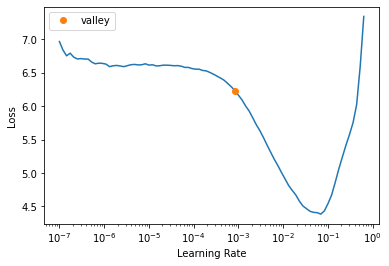

In [17]:
from fastai.callback.fp16 import *
learn = cnn_learner(dls, resnet101, metrics=error_rate).to_fp16()
learn.lr_find()

In [18]:
learn.fine_tune(2, base_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.509733,0.573722,0.172211,04:41


epoch,train_loss,valid_loss,error_rate,time
0,1.167082,0.888654,0.258317,06:19
1,0.679712,0.578291,0.172211,06:18


SuggestedLRs(valley=5.248074739938602e-05)

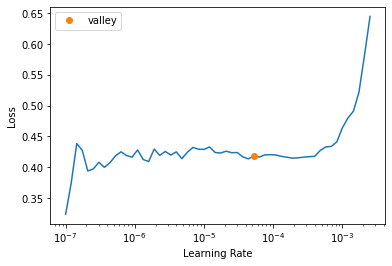

In [19]:
learn.lr_find()

In [20]:
learn.fine_tune(6, freeze_epochs=3, base_lr=2e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.454133,0.568835,0.172701,04:40
1,0.428170,0.560743,0.171233,04:40
2,0.414645,0.552063,0.168297,04:40


epoch,train_loss,valid_loss,error_rate,time
0,0.421341,0.540522,0.166341,06:14
1,0.419131,0.530925,0.159491,06:14
2,0.399788,0.521009,0.154110,06:15
3,0.382446,0.514548,0.155577,06:13
4,0.381853,0.510591,0.158023,06:13
5,0.361773,0.506874,0.155577,06:14


In [22]:
learn = cnn_learner(dls, resnet101, metrics=error_rate).to_fp16()
learn.fine_tune(2, base_lr=3e-3)
learn.fine_tune(3, freeze_epochs=3, base_lr=2e-5)

epoch,train_loss,valid_loss,error_rate,time
0,1.474103,0.675936,0.199119,04:38


epoch,train_loss,valid_loss,error_rate,time
0,1.202458,0.871026,0.262231,06:14
1,0.650611,0.572384,0.169765,06:13


epoch,train_loss,valid_loss,error_rate,time
0,0.423131,0.568526,0.172211,04:40
1,0.421961,0.564101,0.169765,04:40
2,0.434767,0.550113,0.164873,04:41


epoch,train_loss,valid_loss,error_rate,time
0,0.425807,0.544503,0.165362,06:14
1,0.412625,0.536452,0.158513,06:14
2,0.395416,0.536063,0.163405,06:17
